In [117]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import linregress

from sklearn.linear_model import LinearRegression

sns.set_theme(style="whitegrid", context='talk', font_scale=1.5, font="Helvetica")

# Linear Regression

+ A useful tool for predicting a quantitative response. 

## Simple Linear Regression

$$Y \approx \beta_0 + \beta_1 X \quad ,$$

based on which, we can predict using 

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x \quad ,$$

where $\hat{}$ denotes an estimated value or a predicted value.


In [2]:
advertising = pd.read_csv('../datasets/Advertising.csv', index_col=0)

Given prediction $\hat{y}_i$, the ith residual is

$$e_i = y_i - \hat{y}_i \quad ,$$

which can be used to define the residual sum of squares:

$$\mathrm{RSS} = e^2_1 + e^2_1 + \dots + e^2_n \quad .$$

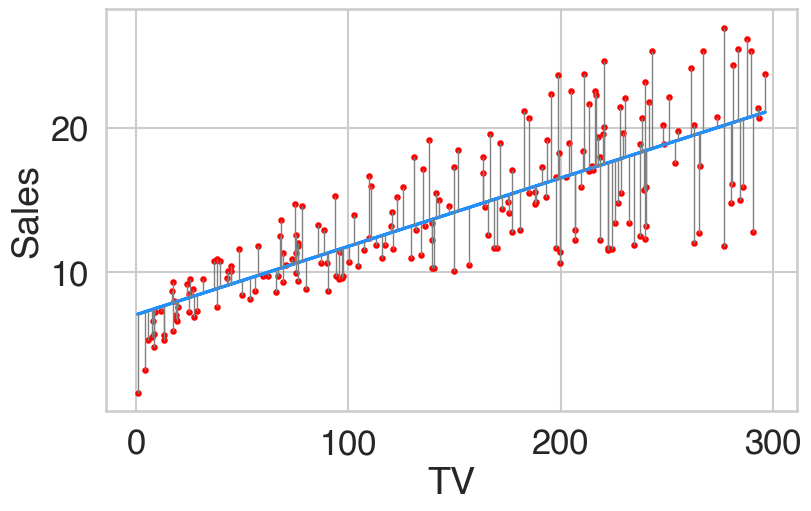

In [84]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(8,5),
    constrained_layout=True)

x = np.array(advertising['TV'])
y = np.array(advertising['sales'])

slope, intercept, r_value, p_value, std_err = linregress(x, y)

y_pred = intercept + slope * x

ax.scatter(x, y, s=10, color='red')
ax.plot(x, y_pred, color='dodgerblue')

SR = []
for i in range(len(x)):
    ax.vlines(x[i], y[i], y_pred[i], color='gray', lw=1 )
    SR.append((y[i] - y_pred[i])**2)

ax.set(xlabel='TV', ylabel='Sales');

To estimate $\beta_0$ and $\beta_1$, we can investigate how they affect RRS:

In [42]:
def get_RSS(x, y, b0, b1):
    y_pred = np.array([i*b1 + b0 for i in x])
    residuls = y - y_pred
    return np.sum(residuls**2)

In [67]:
beta1 = np.linspace(0, 0.1, 100)
beta0 = np.linspace(4, 10, 100)

xi, yi = np.meshgrid(beta1, beta0)

RSS = []
for i in beta1:
    temp = []
    for j in beta0:
        est_RSS = get_RSS(x, y, j, i)
        temp.append(est_RSS)
    RSS.append(temp)
RSS = np.array(RSS)

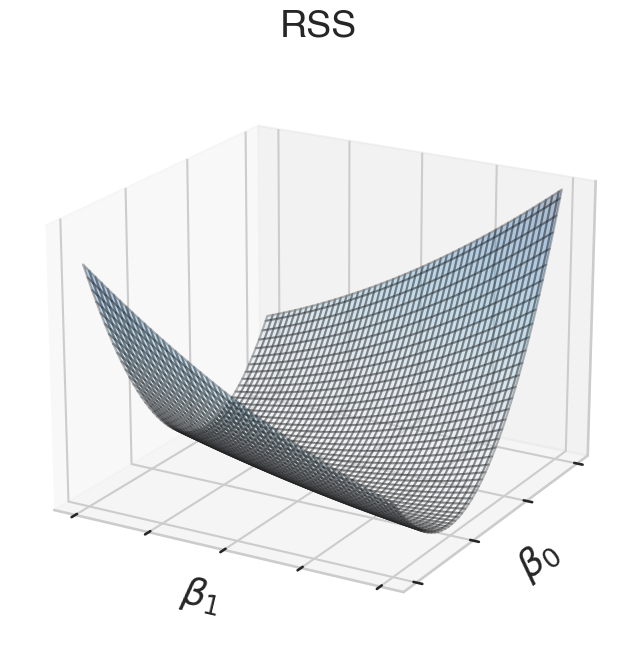

In [80]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xi, yi, RSS, cmap='Blues', alpha=0.3, edgecolor='k')
ax.set(zticks=[], ylabel=r'$\beta_0$', xlabel=r'$\beta_1$', xticklabels=[], yticklabels=[])
ax.set_title('RSS')
ax.view_init(elev=20, azim=300);

### Residual Standard Error

RSE, i.e., the average amount the response will deviate from the true
regression line:

$$\mathrm{RSE} = \sqrt{\frac{1}{n-2} \mathrm{RSS}}$$

In [99]:
RSS = np.round(np.sum(SR), decimals=2)
RSE = np.round(np.sqrt(1/(len(y) - 2)* RSS), decimals=2)

In [101]:
print('RSS=' + str(RSS) + ', RSE=' + str(RSE) )

RSS=2102.53, RSE=3.26


### R2 Statistics

The $R^2$ provides an alternitive measure of fit to $\mathrm{RSE}$, one
that is proportional and not in the units of $Y$. To calculate

$$R^2 = \frac{\mathrm{TSS} - \mathrm{RSS}}{\mathrm{TSS}} = 1 -
\frac{\mathrm{RSS}}{\mathrm{TSS}} \quad ,$$

where $\mathrm{TSS}$ (_total sum of squares_), is $\sum (y_i - \bar{y})^2$.

$R^2$ measure the proportion of variability in $Y$ that can be explained by $X$.

In [110]:
TSS =  np.sum((y - np.mean(y))**2)
R2 = np.round(1 - (RSS/TSS), decimals=2)
R2

np.float64(0.61)

It could be challenging to understand what value of $R^2$ is good given the
context in which the observations were generated.

**Note:** in simple linear regression, $R^2 = r^2$.

# Multiple Linear Regression

''

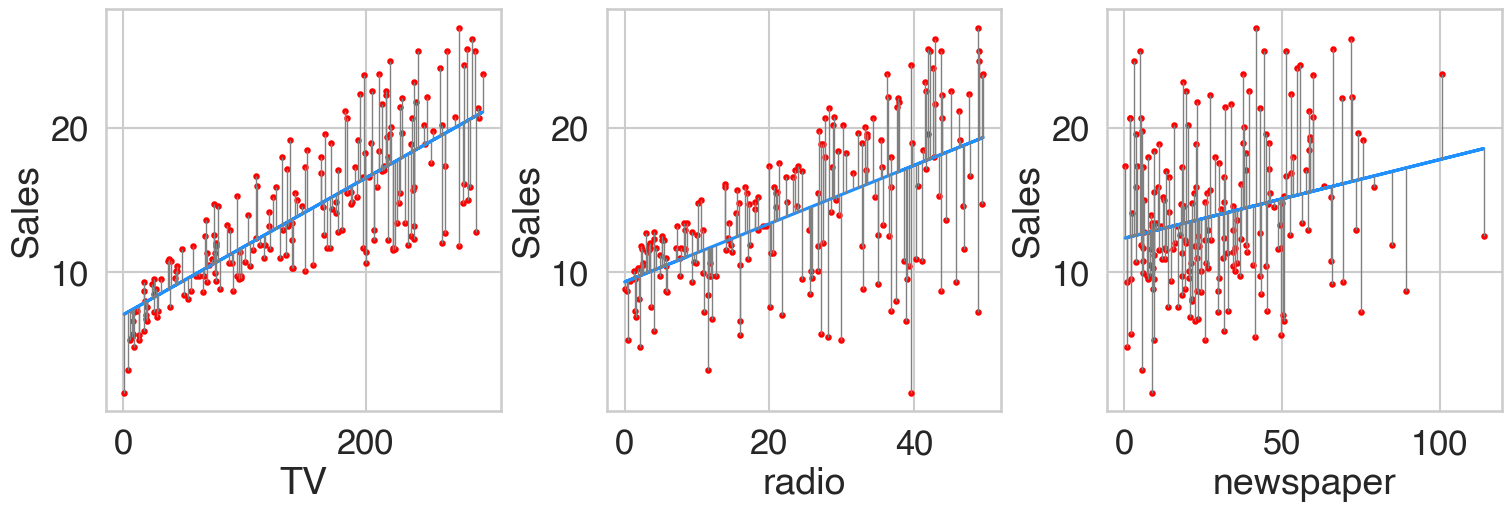

In [115]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(15,5),
    constrained_layout=True)

axes = axes.flatten()


for inp, ax in zip(['TV' , 'radio', 'newspaper'], axes):
    x = np.array(advertising[inp])
    y = np.array(advertising['sales'])

    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    y_pred = intercept + slope * x

    ax.scatter(x, y, s=10, color='red')
    ax.plot(x, y_pred, color='dodgerblue')

    SR = []
    for i in range(len(x)):
        ax.vlines(x[i], y[i], y_pred[i], color='gray', lw=1 )
        SR.append((y[i] - y_pred[i])**2)

    ax.set(xlabel=inp, ylabel='Sales')
;

Problems with fitting each predictor separately:

* It is unclear how to make a single prediction of sales given the three
  advertising media budgets.

* Each of the three regression equations ignores the other two media in
  forming estimates for the regression coefficients

Instead, for $p$ predictors:

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p + \epsilon
\quad .$$

In [193]:
X1 = np.array(advertising['TV'])
X2 = np.array(advertising['newspaper'])
X3 = np.array(advertising['radio'])
Y = np.array(advertising['sales'])

X = np.column_stack((X1, X2, X3))
model = LinearRegression()
model.fit(X, Y)

Y_pred =  model.intercept_ + model.coef_[0] * X1 + model.coef_[1] * X2 + model.coef_[2] * X3 

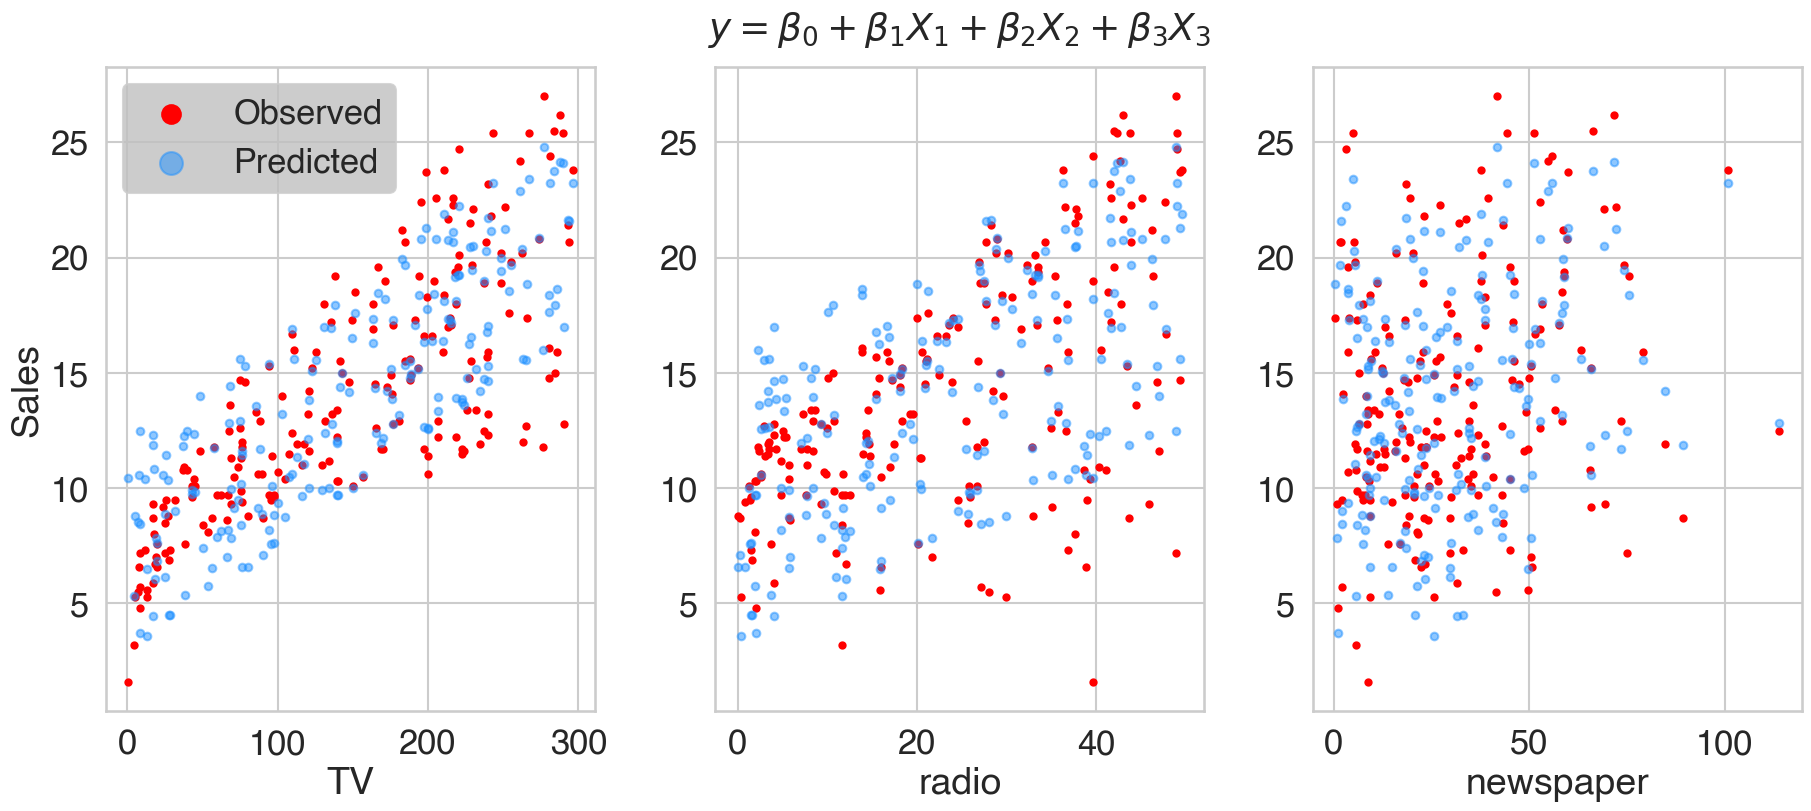

In [218]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(18,8),
    constrained_layout=True)

axes = axes.flatten()


for inp, ax in zip(['TV' , 'radio', 'newspaper'], axes):
    x = np.array(advertising[inp])
    y = np.array(advertising['sales'])

    # y_pred = model.intercept_ + model.coef_[0] * X1 + model.coef_[1] * X2 + model.coef_[2] * X3 

    ax.scatter(x, y, s=20, color='red', label='Observed')
    ax.scatter(x, Y_pred, s=30, alpha=0.5, color='dodgerblue', label='Predicted')

    ax.set(xlabel=inp, ylabel=' ')

axes[0].legend(markerscale=3, facecolor='silver')
axes[0].set_ylabel('Sales')
axes[1].set_title(r'$y= \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3$', pad=20);

+ **Q1:**  Is There a Relationship Between the Response and Predictors?

F-statistics:


$$F = \frac{(\mathrm{TSS} - \mathrm{RSS})/ p}{\mathrm{TSS}/(n - p - 1)}  \quad .$$

In [196]:
RSS =  np.sum([(i -j)**2 for i,j in zip(Y, Y_pred)])
TSS =  np.sum((Y - np.mean(Y))**2)
n = len(Y)
p = 3
F_stat = np.divide((TSS - RSS)/p, RSS/(n - p - 1))


When there is no relationship between the response and predictors, one
would expect the F -statistic to take on a value close to 1, which is not
the case in our example:

In [197]:
np.round(F_stat, decimals=2)

np.float64(570.27)

+ **Q2:**  Which predicor(s) is(are) important?